In [1]:
import numpy as np
import maze as mz 
import pandas as pd

In [2]:
# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 2, 0]
])
# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze

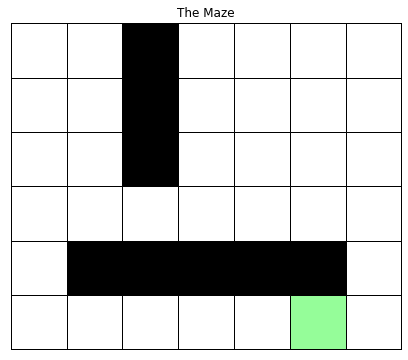

In [3]:
mz.draw_maze(maze)

In [4]:
# Create an environment maze
env = mz.Maze(maze)
env.show()

The states are :
{0: (0, 0, 0, 0), 1: (0, 0, 0, 1), 2: (0, 0, 0, 2), 3: (0, 0, 0, 3), 4: (0, 0, 0, 4), 5: (0, 0, 0, 5), 6: (0, 0, 0, 6), 7: (0, 0, 1, 0), 8: (0, 0, 1, 1), 9: (0, 0, 1, 2), 10: (0, 0, 1, 3), 11: (0, 0, 1, 4), 12: (0, 0, 1, 5), 13: (0, 0, 1, 6), 14: (0, 0, 2, 0), 15: (0, 0, 2, 1), 16: (0, 0, 2, 2), 17: (0, 0, 2, 3), 18: (0, 0, 2, 4), 19: (0, 0, 2, 5), 20: (0, 0, 2, 6), 21: (0, 0, 3, 0), 22: (0, 0, 3, 1), 23: (0, 0, 3, 2), 24: (0, 0, 3, 3), 25: (0, 0, 3, 4), 26: (0, 0, 3, 5), 27: (0, 0, 3, 6), 28: (0, 0, 4, 0), 29: (0, 0, 4, 1), 30: (0, 0, 4, 2), 31: (0, 0, 4, 3), 32: (0, 0, 4, 4), 33: (0, 0, 4, 5), 34: (0, 0, 4, 6), 35: (0, 0, 5, 0), 36: (0, 0, 5, 1), 37: (0, 0, 5, 2), 38: (0, 0, 5, 3), 39: (0, 0, 5, 4), 40: (0, 0, 5, 5), 41: (0, 0, 5, 6), 42: (0, 1, 0, 0), 43: (0, 1, 0, 1), 44: (0, 1, 0, 2), 45: (0, 1, 0, 3), 46: (0, 1, 0, 4), 47: (0, 1, 0, 5), 48: (0, 1, 0, 6), 49: (0, 1, 1, 0), 50: (0, 1, 1, 1), 51: (0, 1, 1, 2), 52: (0, 1, 1, 3), 53: (0, 1, 1, 4), 54: (0, 1, 1, 5), 55

In [19]:
# Finite horizon
horizon = 20
# Solve the MDP problem with dynamic programming 
V, policy= mz.dynamic_programming(env,horizon);

In [22]:
# Simulate the shortest path starting from position A
method = 'DynProg';
start  = (0,0, 5, 5);
path = env.simulate(start, policy, method);

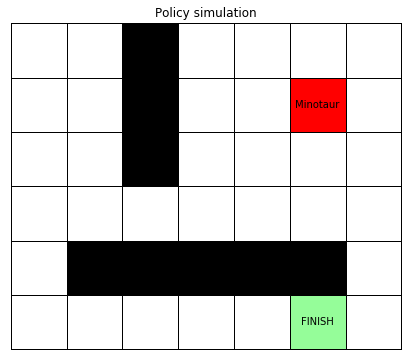

In [23]:
# Show the shortest path
mz.animate_solution(maze, path)

In [24]:
samples = env.sample(start, policy, method, 10000)

In [25]:
print(samples)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 